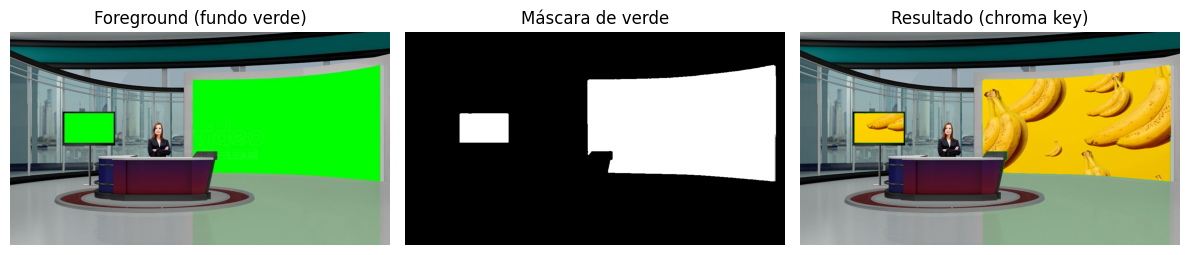

In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# ============ 1) Carregar imagens ============
fg = Image.open('imagem/image2.jpg').convert('RGB')   # imagem com fundo verde
bg = Image.open('imagem/pexels-apasaric.jpg').convert('RGB')   # nova cena de fundo


# Redimensionar o background para o mesmo tamanho do foreground
bg = bg.resize(fg.size, resample=Image.BILINEAR)

# Para NumPy (H, W, 3) e uint8
fg = np.array(fg, dtype=np.uint8)
bg = np.array(bg, dtype=np.uint8)

# ============ 2) Parâmetros do chroma key (RGB) ============
# Regras simples de "verde dominante"
G_MIN = 200       # mínimo absoluto de G para considerar "verde"
DOM_MARGIN = 20  # quão acima G deve estar de R e B (em valores absolutos)
K = 0          # fator de dominância (opção por razão): G > K*R e G > K*B

R = fg[..., 0].astype(np.int16)
G = fg[..., 1].astype(np.int16)
B = fg[..., 2].astype(np.int16)

# Máscara por diferenças absolutas (robusta e intuitiva):
mask_abs = (G > G_MIN) & (G > R + DOM_MARGIN) & (G > B + DOM_MARGIN)

# (Opcional) Máscara por razão (útil quando luz varia muito):
mask_ratio = (G > G_MIN) & (G > (K * R)) & (G > (K * B))

# Use uma das duas ou a interseção/união dependendo do seu cenário.
# Aqui, vou usar a interseção para ser um pouco mais seletivo:
mask = mask_abs & mask_ratio

# ============ 3) Composição ============
out = fg.copy()
out[mask] = bg[mask]

# ============ 4) Visualização ============
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].imshow(fg); axs[0].set_title('Foreground (fundo verde)'); axs[0].axis('off')
axs[1].imshow(mask, cmap='gray'); axs[1].set_title('Máscara de verde'); axs[1].axis('off')
axs[2].imshow(out); axs[2].set_title('Resultado (chroma key)'); axs[2].axis('off')
plt.tight_layout()
plt.show()